# Chapter 2: Data Modification

In this chapter, we are going to go through simple data modification examples,  
which includes the following features:  
A. Basic Calculation Among Sensors
- A-1: Summation
- A-2: Subtraction
- A-3: Multiplication
- A-4: Division

B. Data Selection Based on Multinomial Distribution
- B-1: Same Sensor Probabilities for All Samples
- B-2: Different Sensor Probabilities Among Different Samples

C. Data Calculation Based on Weighted Summation
- C-1: Same Sensor Weights for All Samples
- C-2: Different Sensor Weights Among Different Samples

D. Desired Data Injection
- D-1: Outlier Injection 
- D-2: Null Injection

E. Data Table Management
- E-1: Adding Labels
  - a: Adding Time Stamp as Indices
  - b: Adding Misc. as Indices
- E-2: Sensor Duplication
- E-3: Ordering Sensors
  - a: Sorting Sensors in Alphanumerical Order
  - b: Sorting Sensors in Reverse Order
- E-4: Scaling Sensor Data
  - a: Normalize
  - b: Standardize

## Base Data [A~D]

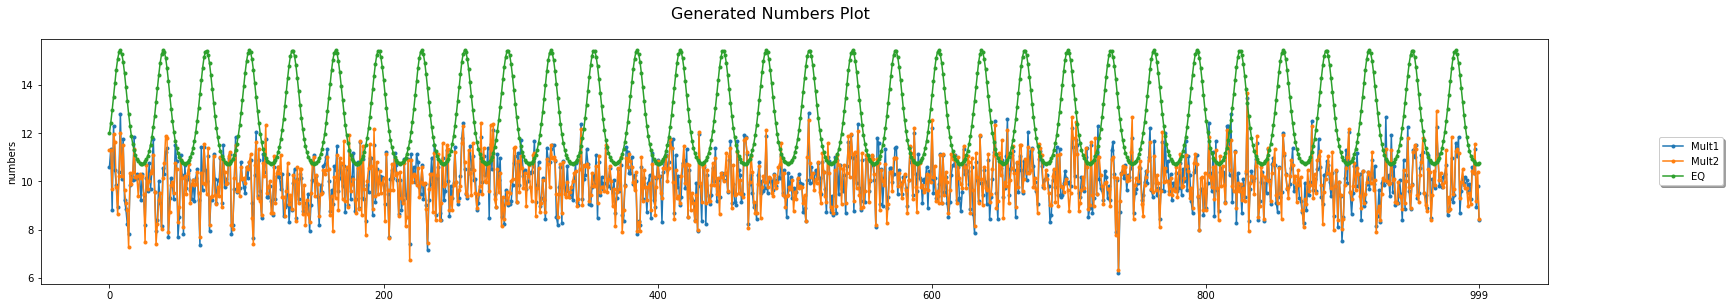

In [1]:
%matplotlib inline
# import libraries
import numpy as np

from data_generator import SensorDataGenerator as sdg
from scipy.stats import random_correlation

# fixed variables
seed = 20171221
sample_size = 1000

# data generation
dg = sdg()
dg.generation_input.add_option(sensor_names="Mult1 Mult2",
                               distribution="multivariatenormal",
                               mu=np.full(2, 10),
                               cov=np.array([[1,0.9],[0.9,1]]))
dg.generation_input.add_option(sensor_names="EQ",
                               eq="2*exp(sin(t))+10",
                               initial={"t":0},
                               step={"t":0.2})

dg.generate(sample_size)
dg.plot_data()

## A. Basic Calculation Among Sensors 

### A-1: Summation

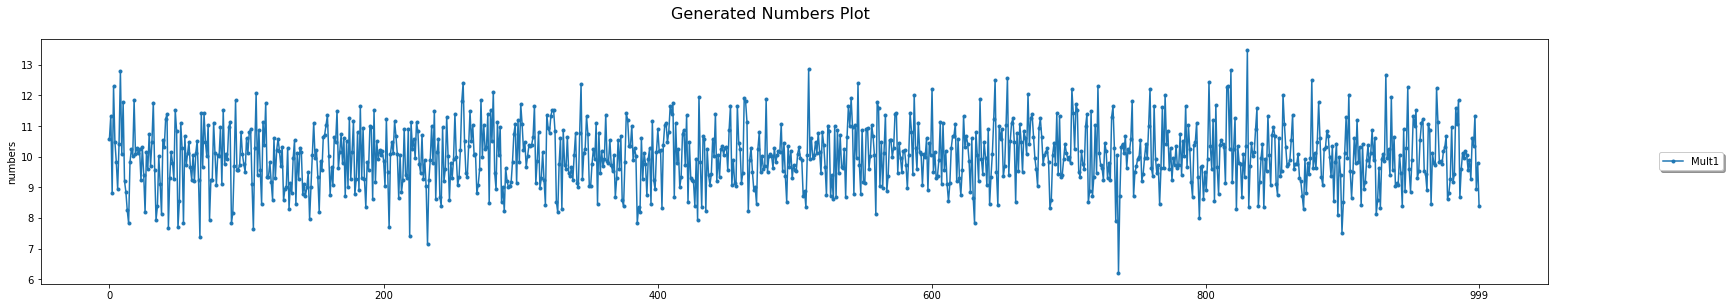

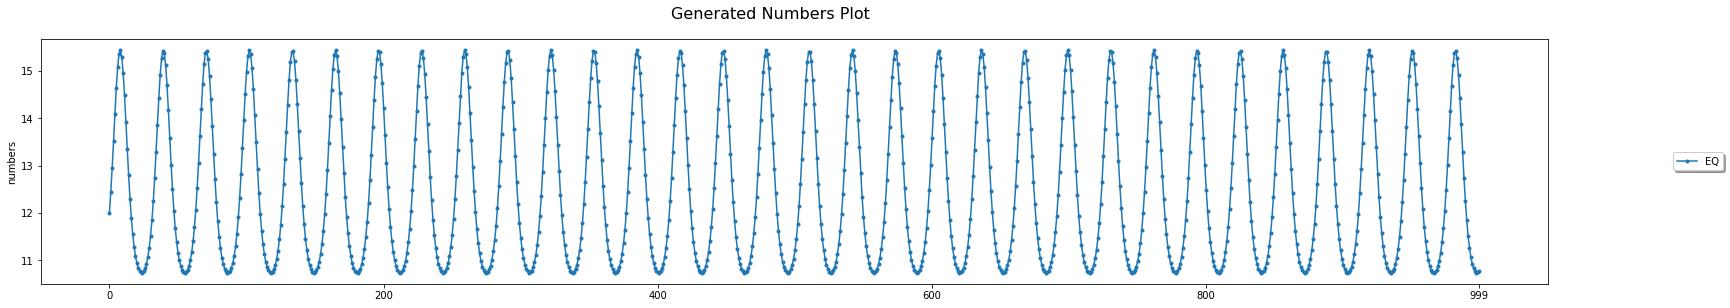

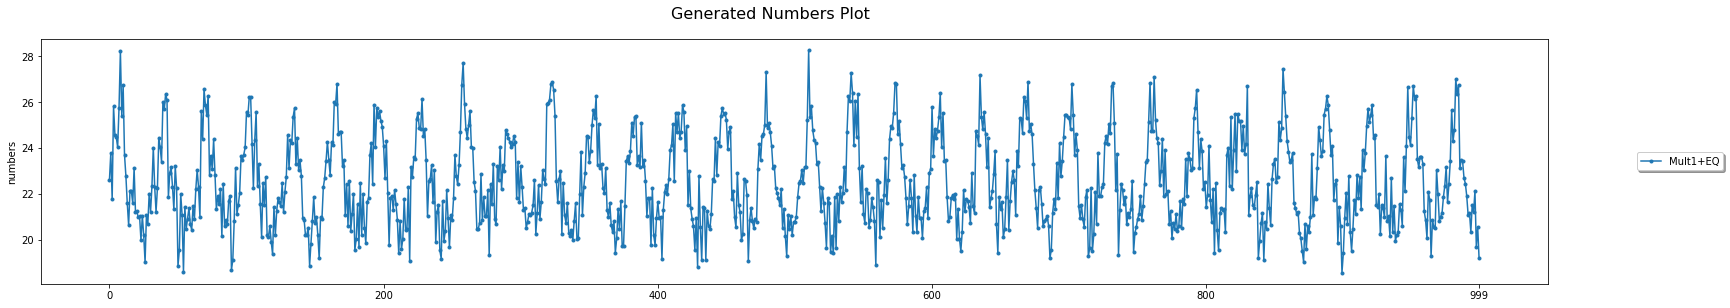

In [2]:
dg.sum(sensors=["Mult1", "EQ"], save_to="Mult1+EQ")
dg.plot_data(sensors=["Mult1"])
dg.plot_data(sensors=["EQ"])
dg.plot_data(sensors=["Mult1+EQ"])

### A-2: Subtraction

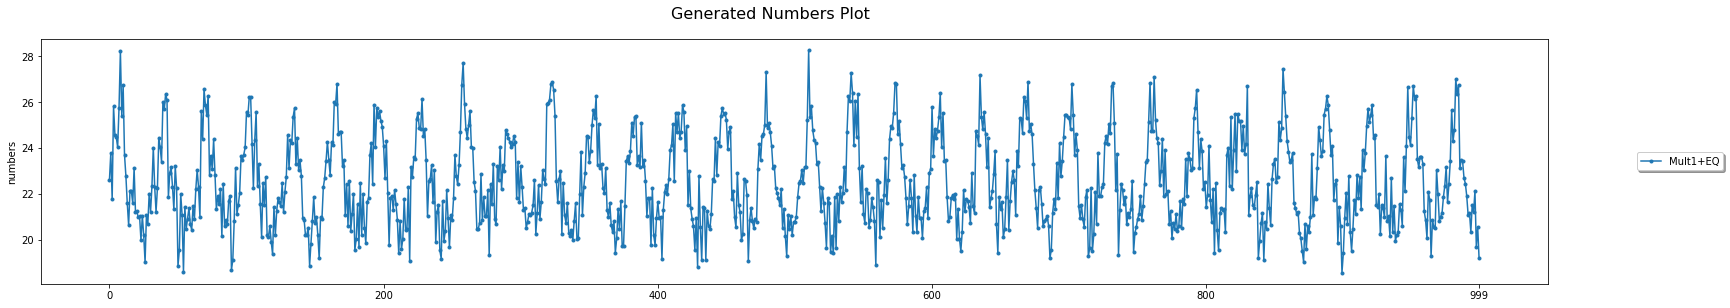

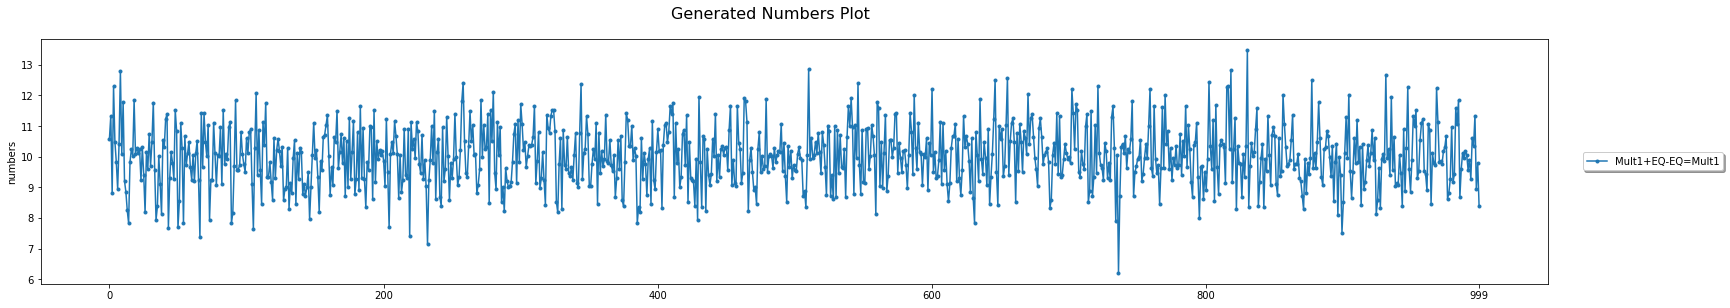

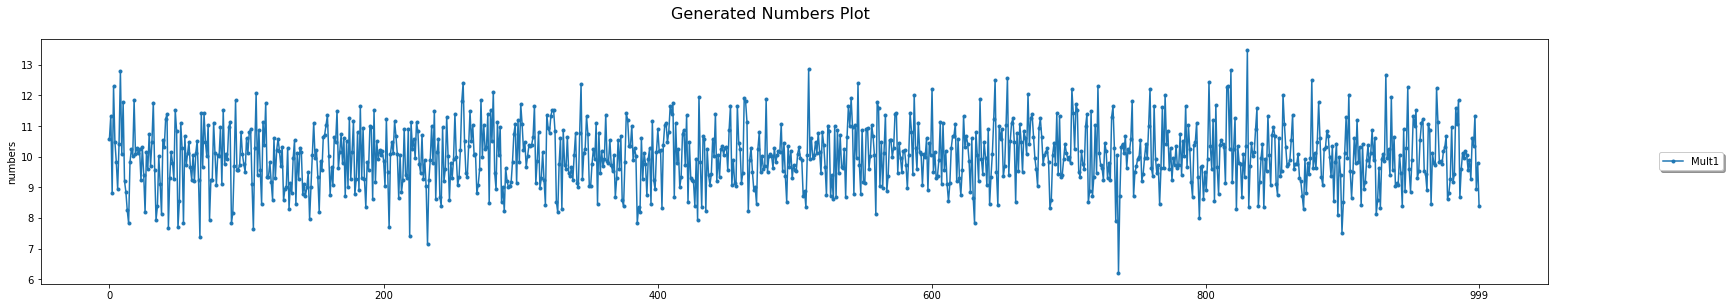

In [3]:
dg.sub(sensors=["Mult1+EQ", "EQ"], save_to="Mult1+EQ-EQ=Mult1")
dg.plot_data(sensors=["Mult1+EQ"])
dg.plot_data(sensors=["Mult1+EQ-EQ=Mult1"])
dg.plot_data(sensors=["Mult1"])

### A-3: Multiplication

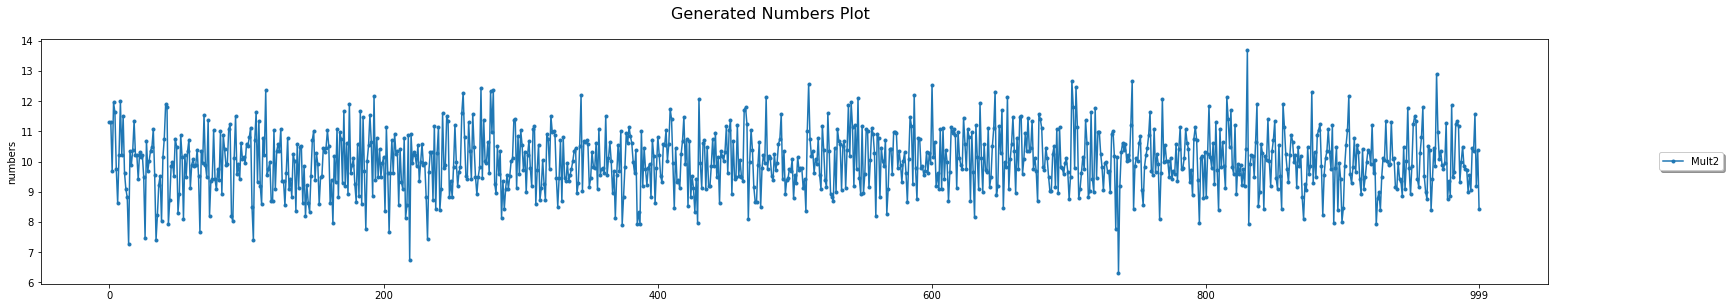

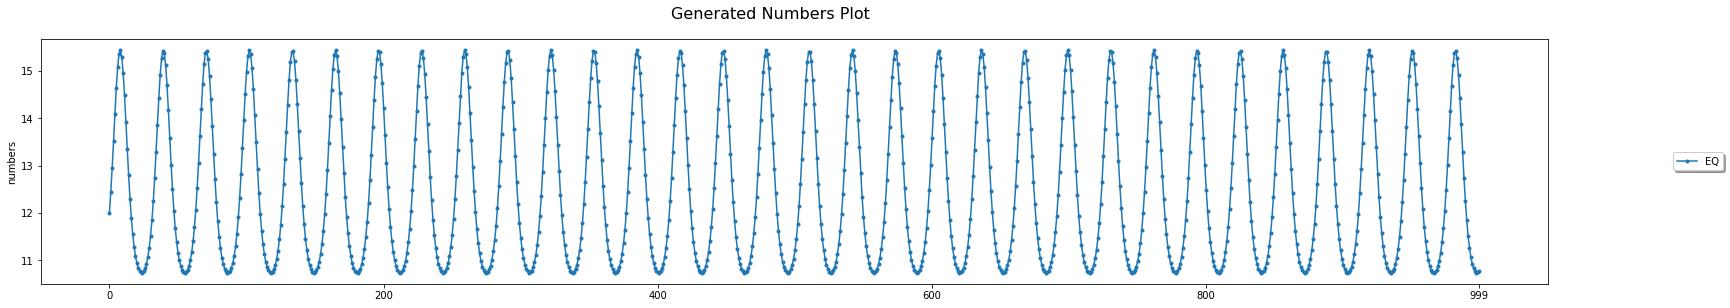

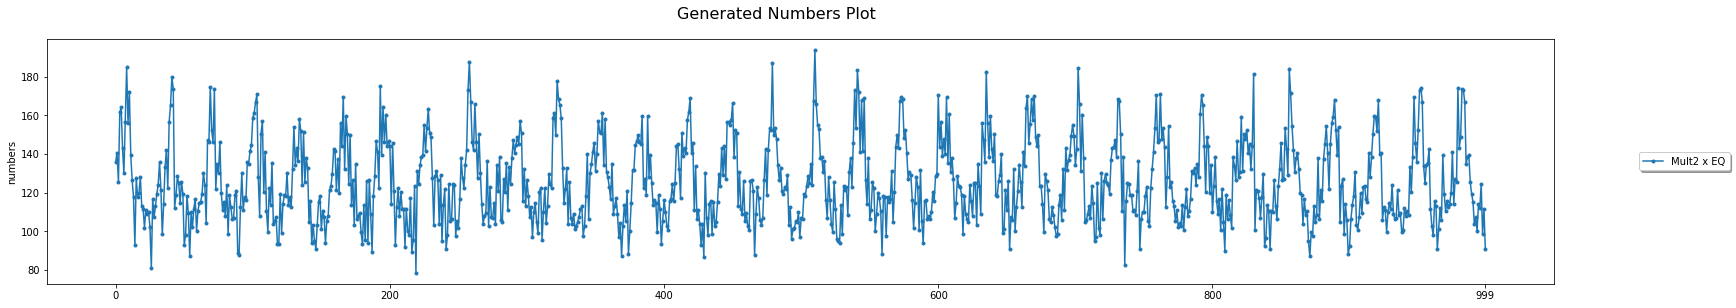

In [4]:
dg.mult(sensors=["Mult2", "EQ"], save_to="Mult2 x EQ")
dg.plot_data(sensors=["Mult2"])
dg.plot_data(sensors=["EQ"])
dg.plot_data(sensors=["Mult2 x EQ"])

### A-4: Division

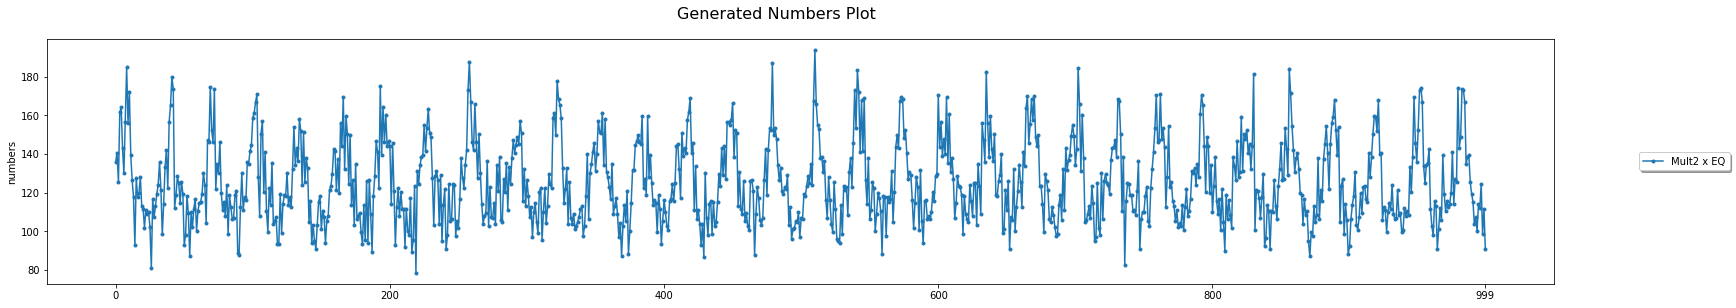

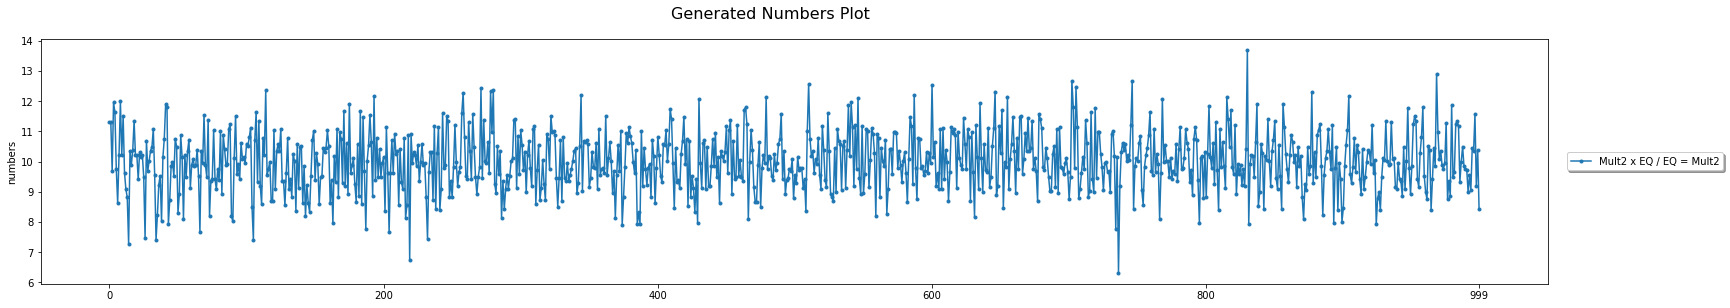

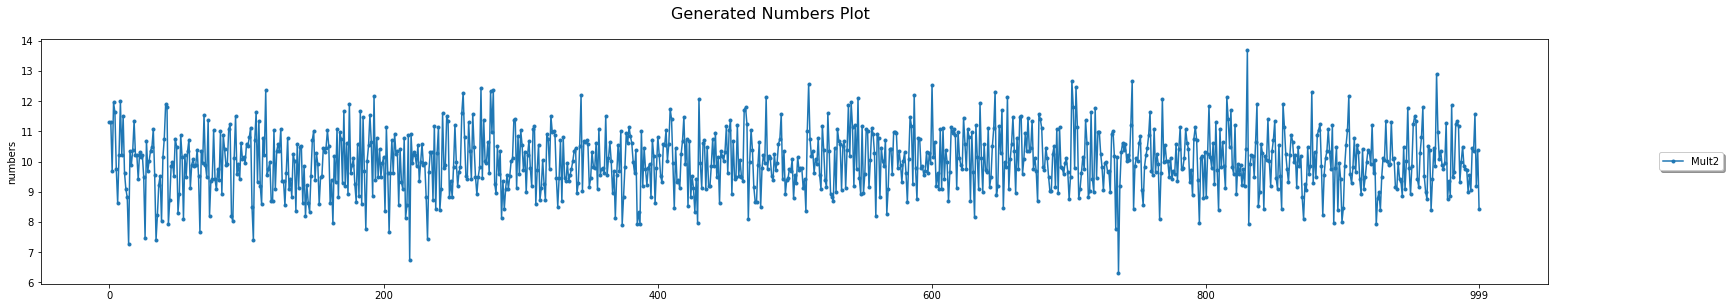

In [5]:
dg.div(sensors=["Mult2 x EQ", "EQ"], save_to="Mult2 x EQ / EQ = Mult2")
dg.plot_data(sensors=["Mult2 x EQ"])
dg.plot_data(sensors=["Mult2 x EQ / EQ = Mult2"])
dg.plot_data(sensors=["Mult2"])

## B. Data Selection Based on Multinomial Distribution

###   B-1: Same Sensor Probabilities for All Samples

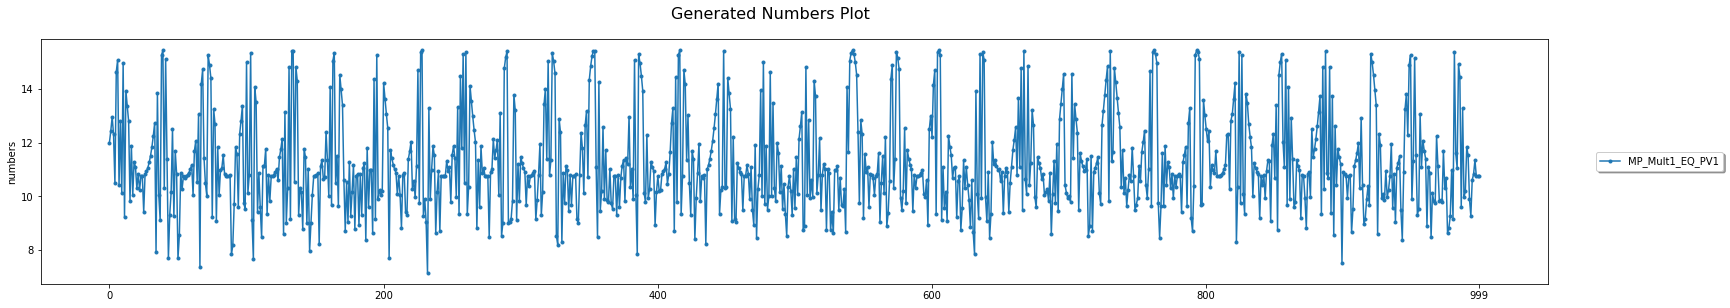

In [6]:
pval1 = [0.5, 0.5]
dg.multinomial_process(sensors=["Mult1", "EQ"], pval=pval1, save_to="MP_Mult1_EQ_PV1")
dg.plot_data(sensors=["MP_Mult1_EQ_PV1"])

### B-2: Different Sensor Probabilities Among Different Samples (Sample-Wise  Sensor Probability)

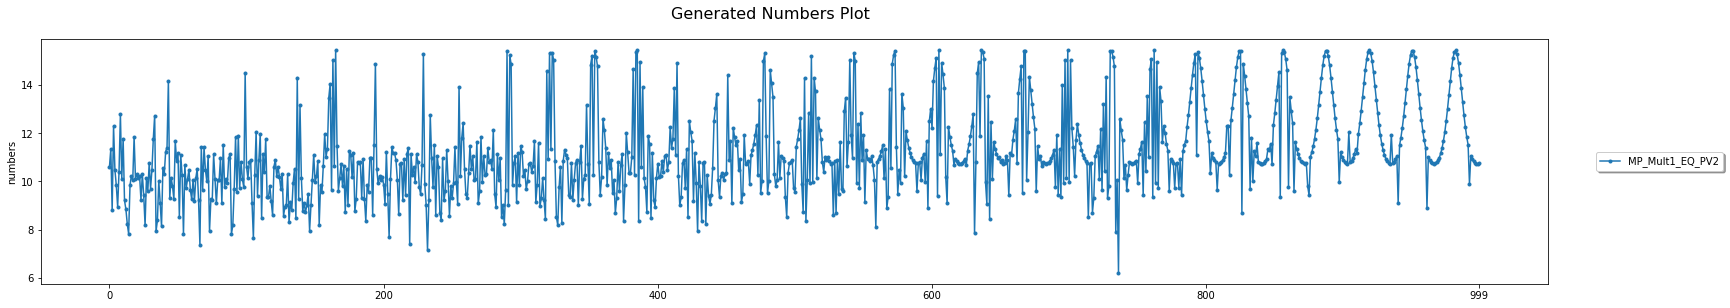

In [7]:
first_sensor_pvals = np.linspace(1, 0, sample_size)
second_sensor_pvals = 1 - first_sensor_pvals
pval2 = np.array([first_sensor_pvals, second_sensor_pvals]).T
dg.multinomial_process(sensors=["Mult1", "EQ"], pval=pval2, save_to="MP_Mult1_EQ_PV2", sample_wise=True)
dg.plot_data(sensors=["MP_Mult1_EQ_PV2"])

## C. Data Calculation Based on Weighted Summation

### C-1: Same Sensor Weights for All Samples

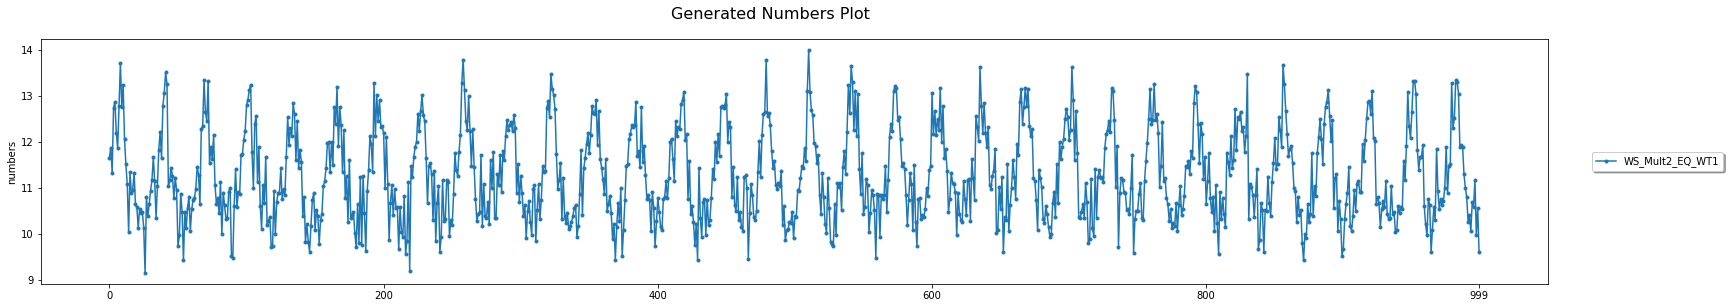

In [8]:
wt1 = [0.5, 0.5]
dg.weighted_sum(sensors=["Mult2", "EQ"], weight=wt1, save_to="WS_Mult2_EQ_WT1")
dg.plot_data(sensors=["WS_Mult2_EQ_WT1"])

### C-2: Different Sensor Weights Among Different Samples (Sample-Wise  Sensor Weight)

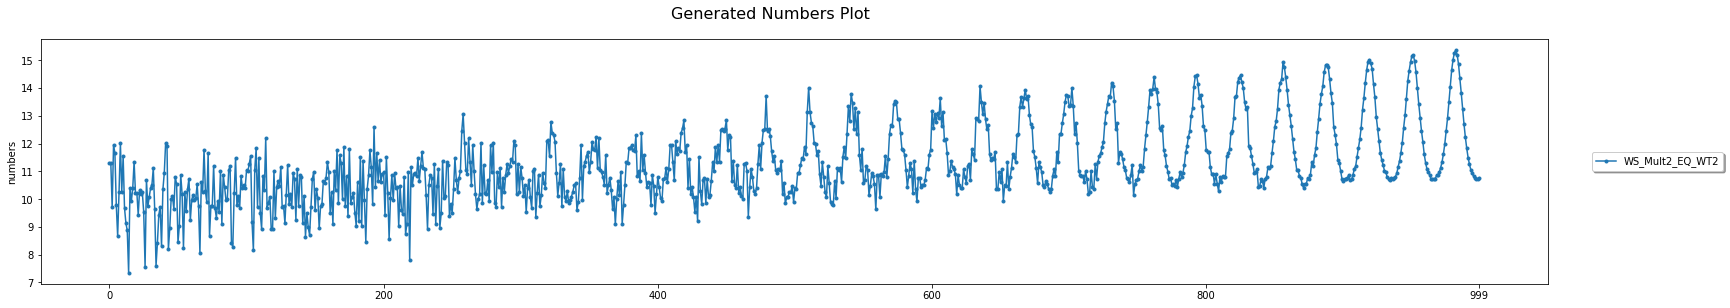

In [9]:
first_sensor_wts = np.linspace(1, 0, sample_size)
second_sensor_wts = 1 - first_sensor_wts
wt2 = np.array([first_sensor_pvals, second_sensor_pvals]).T
dg.weighted_sum(sensors=["Mult2", "EQ"], weight=wt2, save_to="WS_Mult2_EQ_WT2", sample_wise=True)
dg.plot_data(sensors=["WS_Mult2_EQ_WT2"])

##### Notice, the shape of C-2 is different from B-2:
C-2 has weighted sums as results,  
B-2 selects one or another by its sensor probability respect to time t.

## D. Desired Data Injection

### D-1: Outlier Injection

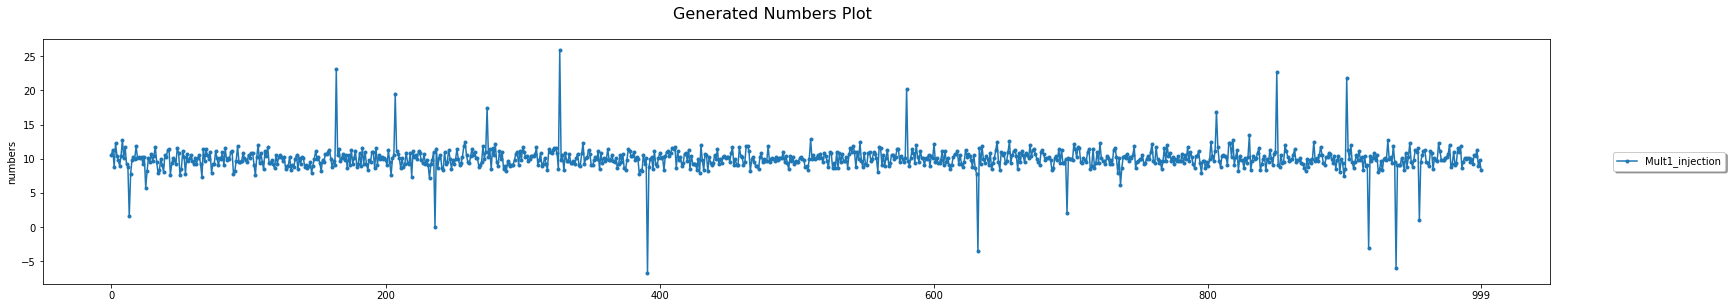

In [10]:
dg.duplicate(sensor="Mult1",  save_to="Mult1_injection")
dg.seed(seed)

n_outliers = 20
outliers = np.random.uniform(-10, 30, n_outliers)
indicies = np.sort(np.random.randint(0, sample_size-1, n_outliers))

dg.inject(value=outliers, sensor="Mult1_injection", index=indicies)
dg.plot_data(sensors=["Mult1_injection"])

### D-2: Null Injection

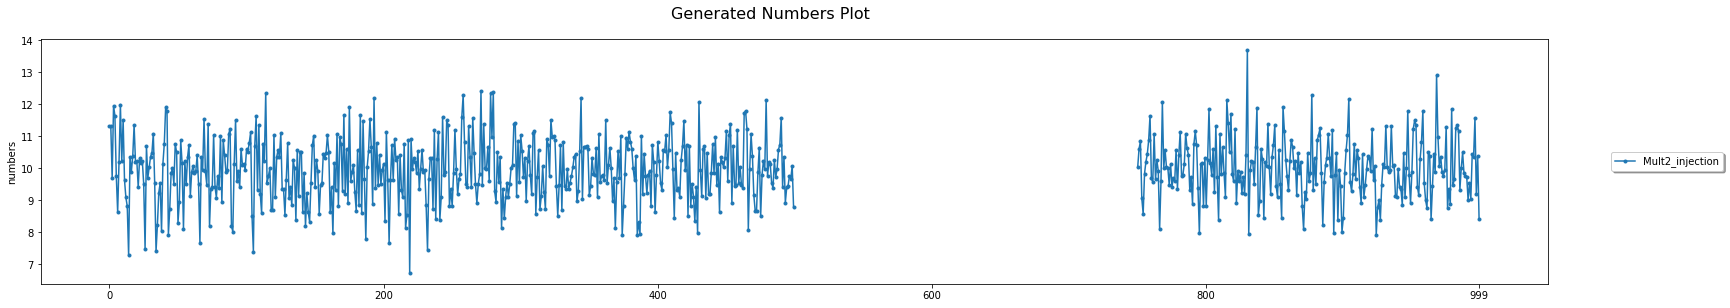

In [11]:
dg.duplicate(sensor="Mult2",  save_to="Mult2_injection")
dg.seed(seed)

n_nulls = int(sample_size*0.25)
start = int(sample_size*0.5)
end = start + n_nulls
indicies = np.arange(start, end, 1)

dg.inject(value=None, sensor="Mult2_injection", index=indicies)
dg.plot_data(sensors=["Mult2_injection"])

## E. Data Table Management

### Base Data [E]

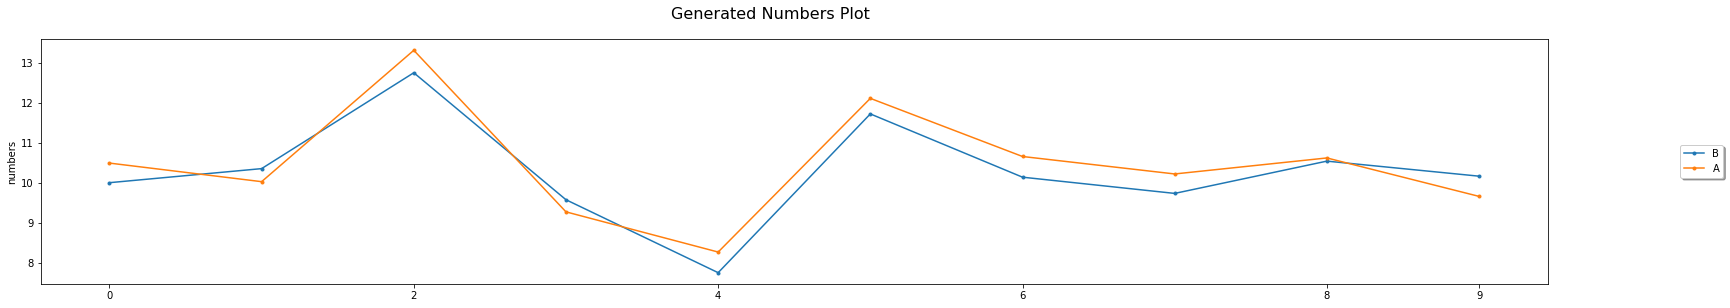

In [12]:
%matplotlib inline
# import libraries
import numpy as np

from data_generator import SensorDataGenerator as sdg
from scipy.stats import random_correlation

# fixed variables
seed = 20171221
sample_size = 10

# data generation
dg = sdg()
dg.generation_input.add_option(sensor_names="B A",
                               distribution="multivariatenormal",
                               mu=np.full(2, 10),
                               cov=np.array([[1,0.9],[0.9,1]]))

dg.generate(sample_size)
dg.plot_data()

### E-1: Adding Labels

#### a: Adding Time Stamp as Indices

##### Constant Time Interval
1 time-interval unit = 1 second

In [13]:
dt = 60
dg.add_time(year=2017, month=12, date=21, time_interval=dt)
print("\nData Table w/ Index:\n")
dg.data


Data Table w/ Index:



,B,A
2017-12-21 00:00:00,10.0016,10.4906
2017-12-21 00:01:00,10.3523,10.0268
2017-12-21 00:02:00,12.7447,13.3048
2017-12-21 00:03:00,9.57603,9.27353
2017-12-21 00:04:00,7.756,8.27076
2017-12-21 00:05:00,11.7175,12.1055
2017-12-21 00:06:00,10.1388,10.655
2017-12-21 00:07:00,9.73412,10.2194
2017-12-21 00:08:00,10.5395,10.6187
2017-12-21 00:09:00,10.164,9.65975


##### Random Time Interval ex) Poisson Distribution

In [14]:
dg.seed(seed)
dt = np.random.poisson(lam=60, size=dg.sample_size)
dg.add_time(year=2017, month=12, date=21, time_interval=dt)
print("\nVariable Time Interval Following Poisson Distribution:\n", dt)
print("\nData Table w/ Index:\n")
dg.data


Variable Time Interval Following Poisson Distribution:
 [55 68 54 72 66 61 64 61 52 55]

Data Table w/ Index:



,B,A
2017-12-21 00:00:00,10.0016,10.4906
2017-12-21 00:00:55,10.3523,10.0268
2017-12-21 00:02:03,12.7447,13.3048
2017-12-21 00:02:57,9.57603,9.27353
2017-12-21 00:04:09,7.756,8.27076
2017-12-21 00:05:15,11.7175,12.1055
2017-12-21 00:06:16,10.1388,10.655
2017-12-21 00:07:20,9.73412,10.2194
2017-12-21 00:08:21,10.5395,10.6187
2017-12-21 00:09:13,10.164,9.65975


#### b: Adding Misc. as Indices
Indices must be a list of desired number/object w/ length=dg.sample_size   
#### [Rule: each index must be unique]
let's violate the rule!  
Index of all 1s.

In [15]:
fool_index = np.full(dg.sample_size, 1)
dg.add_index(indices=fool_index)

ValueError: each index must be unique!

Notice, add_index raises an error due to duplicated indices!

##### Index of Floating Numbers (ascending)

In [16]:
asc = np.linspace(1, 100, dg.sample_size)
dg.add_index(indices=asc)

,B,A
1.0,10.0016,10.4906
12.0,10.3523,10.0268
23.0,12.7447,13.3048
34.0,9.57603,9.27353
45.0,7.756,8.27076
56.0,11.7175,12.1055
67.0,10.1388,10.655
78.0,9.73412,10.2194
89.0,10.5395,10.6187
100.0,10.164,9.65975


##### Index of Floating Numbers (descending)

In [17]:
dsc = np.linspace(100, 1, dg.sample_size)
dg.add_index(indices=dsc)

,B,A
100.0,10.0016,10.4906
89.0,10.3523,10.0268
78.0,12.7447,13.3048
67.0,9.57603,9.27353
56.0,7.756,8.27076
45.0,11.7175,12.1055
34.0,10.1388,10.655
23.0,9.73412,10.2194
12.0,10.5395,10.6187
1.0,10.164,9.65975


##### Index of Integers (random order)

In [18]:
rnd = np.random.randn(dg.sample_size)
dg.add_index(indices=rnd)

,B,A
-0.732512,10.0016,10.4906
-0.120529,10.3523,10.0268
0.172482,12.7447,13.3048
-0.216564,9.57603,9.27353
0.104364,7.756,8.27076
-0.665702,11.7175,12.1055
-0.001641,10.1388,10.655
0.261203,9.73412,10.2194
-1.352615,10.5395,10.6187
-0.340201,10.164,9.65975


##### Index of String+Integer (two kinds of strings)

In [19]:
n_section1 = int(dg.sample_size*0.5)
n_section2 = dg.sample_size - n_section1
section1 = ["Index_A"+str(i+1) for i in range(n_section1)]
section2 = ["Index_B"+str(i+1) for i in range(n_section2)]
all_index = np.array(section1+section2)
dg.add_index(indices=all_index)

,B,A
Index_A1,10.0016,10.4906
Index_A2,10.3523,10.0268
Index_A3,12.7447,13.3048
Index_A4,9.57603,9.27353
Index_A5,7.756,8.27076
Index_B1,11.7175,12.1055
Index_B2,10.1388,10.655
Index_B3,9.73412,10.2194
Index_B4,10.5395,10.6187
Index_B5,10.164,9.65975


### E-2: Sensor Duplication

In [20]:
dg.duplicate(sensor="A", save_to="A_DUP")
dg.duplicate(sensor="B", save_to="B_DUP")

,B,A,A_DUP,B_DUP
Index_A1,10.0016,10.4906,10.490578,10.001570
Index_A2,10.3523,10.0268,10.026760,10.352349
Index_A3,12.7447,13.3048,13.304814,12.744681
Index_A4,9.57603,9.27353,9.273531,9.576028
Index_A5,7.756,8.27076,8.270761,7.755997
Index_B1,11.7175,12.1055,12.105537,11.717478
Index_B2,10.1388,10.655,10.655014,10.138849
Index_B3,9.73412,10.2194,10.219351,9.734123
Index_B4,10.5395,10.6187,10.618650,10.539507
Index_B5,10.164,9.65975,9.659754,10.163970


### E-3: Ordering Sensors

#### a: Sorting Sensors in Alphanumerical Order

In [21]:
dg_reo = dg.copy()
dg_reo.reorder()
dg_reo.data

,A,A_DUP,B,B_DUP
Index_A1,10.4906,10.490578,10.0016,10.001570
Index_A2,10.0268,10.026760,10.3523,10.352349
Index_A3,13.3048,13.304814,12.7447,12.744681
Index_A4,9.27353,9.273531,9.57603,9.576028
Index_A5,8.27076,8.270761,7.756,7.755997
Index_B1,12.1055,12.105537,11.7175,11.717478
Index_B2,10.655,10.655014,10.1388,10.138849
Index_B3,10.2194,10.219351,9.73412,9.734123
Index_B4,10.6187,10.618650,10.5395,10.539507
Index_B5,9.65975,9.659754,10.164,10.163970


#### b: Sorting Sensors in Reverse Order

##### Sample-Wise Reverse

In [22]:
dg_rev = dg.copy()
dg_rev.reverse(axis=0)
dg_rev.data

,B,A,A_DUP,B_DUP
Index_A1,10.164,9.65975,9.659754,10.163970
Index_A2,10.3523,10.0268,10.026760,10.352349
Index_A3,12.7447,13.3048,13.304814,12.744681
Index_A4,9.57603,9.27353,9.273531,9.576028
Index_A5,7.756,8.27076,8.270761,7.755997
Index_B1,11.7175,12.1055,12.105537,11.717478
Index_B2,10.1388,10.655,10.655014,10.138849
Index_B3,9.73412,10.2194,10.219351,9.734123
Index_B4,10.5395,10.6187,10.618650,10.539507
Index_B5,10.0016,10.4906,10.490578,10.001570


##### Sensor-Wise Reverse

In [23]:
dg_rev = dg.copy()
dg_rev.reverse(axis=1)
dg_rev.data

,B_DUP,A_DUP,A,B
Index_A1,10.001570,10.490578,10.4906,10.0016
Index_A2,10.352349,10.026760,10.0268,10.3523
Index_A3,12.744681,13.304814,13.3048,12.7447
Index_A4,9.576028,9.273531,9.27353,9.57603
Index_A5,7.755997,8.270761,8.27076,7.756
Index_B1,11.717478,12.105537,12.1055,11.7175
Index_B2,10.138849,10.655014,10.655,10.1388
Index_B3,9.734123,10.219351,10.2194,9.73412
Index_B4,10.539507,10.618650,10.6187,10.5395
Index_B5,10.163970,9.659754,9.65975,10.164


### E-4: Scaling Sensor Data

#### a: Normalize

In [24]:
dg_norm = dg.copy()
dg_norm.normalize(option="l2")

,B,A,A_DUP,B_DUP
Index_A1,0.487929,0.511786,0.511786,0.487929
Index_A2,0.507923,0.491949,0.491949,0.507923
Index_A3,0.489136,0.510633,0.510633,0.489136
Index_A4,0.507959,0.491913,0.491913,0.507959
Index_A5,0.483691,0.515794,0.515794,0.483691
Index_B1,0.491790,0.508077,0.508077,0.491790
Index_B2,0.487438,0.512254,0.512254,0.487438
Index_B3,0.487697,0.512008,0.512008,0.487697
Index_B4,0.498126,0.501867,0.501867,0.498126
Index_B5,0.512552,0.487125,0.487125,0.512552


#### b: Standardize

In [25]:
dg_std = dg.copy()
dg_std.standardize()

,B,A,A_DUP,B_DUP
Index_A1,-0.217664,0.020975,0.020975,-0.217664
Index_A2,0.064197,-0.325203,-0.325203,0.064197
Index_A3,1.986505,2.121426,2.121426,1.986505
Index_A4,-0.559599,-0.887388,-0.887388,-0.559599
Index_A5,-2.022047,-1.635821,-1.635821,-2.022047
Index_B1,1.161117,1.226326,1.226326,1.161117
Index_B2,-0.107356,0.143705,0.143705,-0.107356
Index_B3,-0.432565,-0.181459,-0.181459,-0.432565
Index_B4,0.214584,0.116564,0.116564,0.214584
Index_B5,-0.087171,-0.599124,-0.599124,-0.087171
